In [ ]:
# problem: remove ab aggregates from single positive EVs
# target: 0 for ab aggregates, 1 for EV (classification)

In [1]:
import pandas as pd
%matplotlib inline 
import numpy as np
from scipy.stats import lognorm, norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

In [2]:
#AB fitting with curve_fit, bins need to be 200!
# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230427 tim4 b1 c1/pbs/20230427 tim4 pbs AB total.csv')

df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/control cd9 cd81/wash twice/total.csv')

#discard headers
df_new = df.loc[13:] # 14 for single file, 13 for 'total' file
df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
df1=df1.drop(df1.index[0])
df1=df1.reset_index(drop=True)
df1 = df1[df1.columns].astype(float)

rslt_df_0 = df1[(df1['Channel 1 binned counts'] >= 3 )| (df1['Channel 2 binned counts'] >= 3)]  #channel 1 or 2 positive
radius = rslt_df_0[rslt_df_0['radius_of_gyration']<300]['radius_of_gyration']
print('interested particle numbers for ab aggregates')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())

interested particle numbers for ab aggregates
2226
median radius of interested particle numbers
18.7336


(array([239., 825., 453., 149.,  88.,  70.,  50.,  38.,  34.,  24.,  24.,
         19.,  16.,  13.,  12.,  10.,   9.,   8.,  14.,   9.,  10.,  13.,
          8.,   5.,   7.,  18.,   4.,   3.,   4.,   4.,   4.,   3.,   5.,
          3.,   4.,   5.,   4.,   4.,   5.,   0.,   0.,   3.,   3.,   2.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  8.343956  ,  13.30308388,  18.26221176,  23.22133964,
         28.18046752,  33.1395954 ,  38.09872328,  43.05785116,
         48.01697904,  52.97610692,  57.9352348 ,  62.89436268,
         67.85349056,  72.81261844,  77.77174632,  82.7308742 ,
         87.69000208,  92.64912996,  97.60825784, 102.56738572,
        107.5265136 , 112.48564148, 117.44476936, 122.40389724,
        127.36302512, 132.322153  , 137.28128088, 142.24040876,
        147.19953664, 152.15866452, 157.1177924 , 162.07692028,
        167.03604816, 171.99517604, 176.95430392, 181.9134318 ,
        186.87255968, 191.83168756, 196.79081544, 201.74994332,
        206.709071

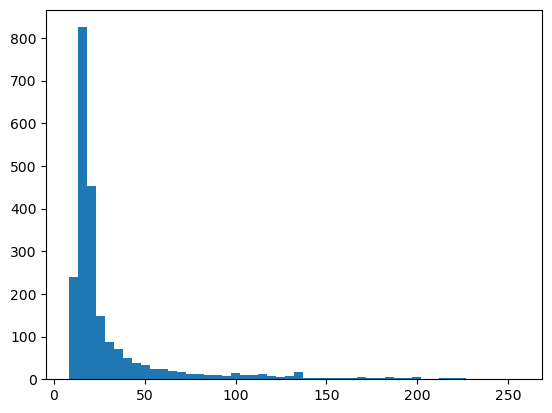

In [3]:
plt.hist(radius,bins=50)

In [4]:
rslt_df_0=rslt_df_0.reset_index(drop=True)
# rslt_df_0=rslt_df_0.drop('index', axis=1)
rslt_df_0['label'] = [0]*len(rslt_df_0)

In [5]:
#EV

df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230427 tim4 b1 c1/B1/20230427 tim4 B1 ONI total.csv')

df_new = df.loc[13:] # 14 for single file, 13 for 'total' file

df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
df1=df1.drop(df1.index[0])
df1=df1.reset_index(drop=True)
df2 = df1[df1.columns].astype(float)

rslt_df_1 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 1&2 positive
radius = rslt_df_1[rslt_df_1['radius_of_gyration']<300]['radius_of_gyration']
# radius = rslt_df['radius_of_gyration']
print(len(rslt_df_1))

8148


In [6]:
rslt_df_1=rslt_df_1.reset_index(drop=True)
# rslt_df_1=rslt_df_1.drop('index', axis=1)
rslt_df_1['label'] = [1]*len(rslt_df_1)

In [7]:
# split 1 double positive particle to 2 single positive particle and change the feature value
import random
import copy

# rslt_df_1_1 = pd.DataFrame()
rslt_df_1_1 = copy.deepcopy(rslt_df_1)
random_numbers = np.random.randint(low=0, high=3, size=len(rslt_df_1_1))
rslt_df_1_1['Channel 2 binned counts'] = random_numbers
rslt_df_1_1['Channel 2 positive'] = 0

# rslt_df_1_1 = pd.DataFrame()
rslt_df_1_2 = copy.deepcopy(rslt_df_1)
random_numbers = np.random.randint(low=0, high=3, size=len(rslt_df_1_1))
rslt_df_1_2['Channel 1 binned counts'] = random_numbers
rslt_df_1_2['Channel 1 positive'] = 0

In [8]:
n_0 = int(len(rslt_df_0)*4/5)
n_1 = int(len(rslt_df_1)*4/5)

In [9]:
train_0 = rslt_df_0.iloc[:n_0,:]
# train_1 = rslt_df_1.iloc[:n_1,:]
train_2 = rslt_df_1_1.iloc[:n_1,:]
train_3 = rslt_df_1_2.iloc[:n_1,:]
train_total = pd.concat([train_0,train_2,train_3]).reset_index(drop=True)
# train = train_total.sample(frac=1, random_state=42).reset_index(drop=True)
train = train_total

In [10]:
# result = pd.concat([rslt_df_0, rslt_df_1])

In [11]:
# result = result.reset_index(drop=True)

In [12]:
test_0 = rslt_df_0.iloc[n_0:,:]
# test_1 = rslt_df_1.iloc[n_1:,:]
test_2 = rslt_df_1_1.iloc[n_1:,:]
test_3 = rslt_df_1_2.iloc[n_1:,:]
test_total = pd.concat([test_0,test_2,test_3]).reset_index(drop=True)
# test = test_total.sample(frac=1, random_state=42).reset_index(drop=True)
test = test_total

In [13]:
import matplotlib.pylab as plt
%matplotlib inline

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# from sklearn.base import TransformerMixin

class Transformer():

    def __init__(self):
        self.mean = 0
    
    def fit(self, X, y=None):
        '''
        Get mean
        Input: X datafrome
        '''
        

    def transform(self, X, y=None):
        '''
        Transform data and fill na with mean
        Input: X dataframe
        '''
        df = pd.DataFrame()
        
        df['num_localisations']=X['num_localisations']
        df['skew']=X['skew']
        df['circularity']=X['circularity']
        df['density']=X['density']
        df['convex_hull_area']=X['convex_hull_area']
        df['discretised_area']=X['discretised_area']
        df['radius_of_gyration']=X['radius_of_gyration']
        df['length']=X['length']
        df['distance_birth']=X['distance_birth']
        df['distance_death']=X['distance_death']
        df['Channel 1 binned counts'] = X['Channel 1 binned counts']
        df['Channel 2 binned counts'] = X['Channel 2 binned counts']
#         df['Channel 1 positive'] = X['Channel 1 positive']
#         df['Channel 2 positive'] = X['Channel 2 positive']
        
        return df

    
 
    def fit_transform(self, X, y=None):
        '''
        Combine fit and transform
        Input: X dataframe
        '''        
        self.fit(X)
        return self.transform(X)
          

In [15]:
# Transformer().fit_transform(X_train)

In [16]:
# df_copy.tail(20)
features = list(train.columns)
target = 'label'
features.remove(target)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [17]:
X_train

13,id,x,y,num_localisations,skew,circularity,density,convex_hull_area,discretised_area,radius_of_gyration,length,distance_birth,distance_death,channelGroupIndex,Channel 1 binned counts,Channel 2 binned counts,Channel 1 positive,Channel 2 positive
0,32465.0,46512.523,78794.010,464.0,1.839434,0.859016,0.107602,4312.1875,6800.0,19.689600,72.562130,1612.90770,3.385545,0.0,0.0,16.0,0.0,1.0
1,32469.0,47834.477,77767.850,34.0,1.781715,0.590072,0.010626,3199.5625,4400.0,27.191032,82.256590,531.46960,17.111925,0.0,0.0,11.0,0.0,1.0
2,32470.0,48343.600,78099.170,30.0,1.762542,0.772791,0.023402,1281.9531,2400.0,15.957308,48.440710,531.46960,17.766054,0.0,0.0,8.0,0.0,1.0
3,32473.0,48787.824,75582.980,34.0,1.027034,0.695884,0.010928,3111.1494,4000.0,21.249687,43.988724,487.89218,17.524555,0.0,0.0,10.0,0.0,1.0
4,32474.0,48593.900,76125.000,116.0,1.203278,0.819528,0.040705,2849.7500,4800.0,16.703272,49.019146,487.89218,6.600189,0.0,0.0,12.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,281874.0,13333.669,66962.960,71.0,1.079240,0.892957,0.011090,6401.9375,7600.0,27.423016,93.637665,409.91360,13.913384,0.0,2.0,6.0,0.0,1.0
14813,281880.0,9939.347,45296.290,49.0,3.192189,0.503558,0.005775,8485.5000,5600.0,40.332397,168.646800,197.28981,12.138171,0.0,1.0,8.0,0.0,1.0
14814,281901.0,18066.469,51773.600,51.0,1.243571,0.786533,0.002931,17397.6250,9600.0,65.418370,162.909180,160.44688,31.029620,0.0,0.0,5.0,0.0,1.0
14815,281906.0,20799.482,36863.652,17.0,1.294987,0.808684,0.003916,4340.7188,4800.0,30.770826,91.059630,261.75815,68.998535,0.0,2.0,3.0,0.0,1.0


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Create and train the SVM classifier
# model = SVC(kernel='linear')

pipeline = Pipeline(steps=[
    ('tf', Transformer()),
    ('scaler', MinMaxScaler()),       # Apply MinMaxScaler
#     ('classifier', LogisticRegression(class_weight = 'balanced'))
    ('classifier', SVC(kernel='linear',class_weight='balanced',probability=True))
#     ('classifier', SVC(kernel='linear'))
])

In [19]:
from sklearn.metrics import accuracy_score

# Fit the pipeline
pipeline.fit(X_train, y_train)

support_vectors = pipeline.steps[2][1].support_vectors_

y_train_pred = pipeline.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
print("train Accuracy:", accuracy)

# Make predictions on the test set
y_test_pred = pipeline.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_test_pred)
print("test Accuracy:", accuracy)


train Accuracy: 0.9620705945872984
test Accuracy: 0.974635725849973


In [20]:
from sklearn.metrics import accuracy_score

# Compute accuracy score
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print accuracy score
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.9620705945872984
Test Accuracy: 0.974635725849973


In [21]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_train, y_train_pred)

# Print classification report
print(report)

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print classification report
print(report)

from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm1 = confusion_matrix(y_train, y_train_pred)
cm2 = confusion_matrix(y_test, y_test_pred)


# Print confusion matrix
print(cm1)
print(cm2)


              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1781
           1       0.99      0.96      0.98     13036

    accuracy                           0.96     14817
   macro avg       0.89      0.96      0.92     14817
weighted avg       0.97      0.96      0.96     14817

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       446
           1       1.00      0.97      0.99      3260

    accuracy                           0.97      3706
   macro avg       0.92      0.97      0.94      3706
weighted avg       0.98      0.97      0.98      3706

[[ 1715    66]
 [  496 12540]]
[[ 435   11]
 [  83 3177]]


In [22]:
#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels
# cd9
# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/oni ev cd9 cd81/wash twice/1.csv')
#df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230421 tim4 sonicate ab d10/ab/20230421 tim4 oni ev ab 2.csv')


rslt_df1 = df2[(df2['Channel 1 binned counts'] < 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 2 positive
rslt_df2 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] < 3)]  #channel 1 positive
rslt_df = pd.concat([rslt_df1,rslt_df2]).reset_index(drop=True)

radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 2/CD9 single positive')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())




interested particle numbers for channel 2/CD9 single positive
12734
median radius of interested particle numbers
36.304525


In [23]:
X_test_2 = rslt_df[features]

y_test_2 = pipeline.predict(X_test_2)

In [24]:
sum(y_test_2)/len(y_test_2)*100

80.17119522538087

In [25]:
# Print accuracy score
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.9620705945872984
Test Accuracy: 0.974635725849973


AUC-ROC Score: 0.9919935899199428


Text(0, 0.5, 'true positive rate')

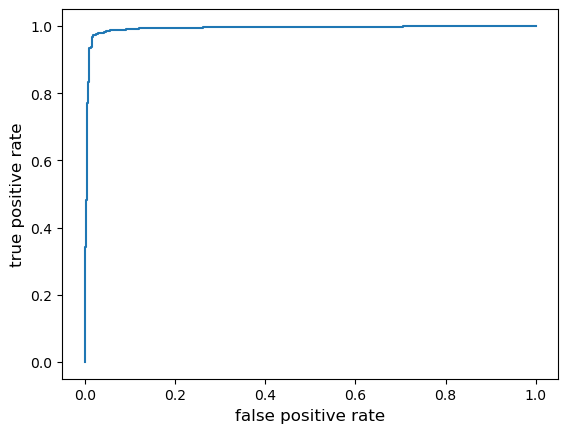

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Make predictions on the train & test set
# y_pred_prob_train = pipeline.predict_proba(X_train)[:, 1]
y_pred_prob_test = pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_pred_prob_test)

print("AUC-ROC Score:", auc_roc_score)

# roc_auc_score(y_train, y_train_proba[:, 1])

# roc_auc_score(y_test, y_test_proba[:, 1])

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob_test)

plt.plot(fpr,tpr)

plt.xlabel('false positive rate', fontsize=12)
plt.ylabel('true positive rate', fontsize=12)

Text(0, 0.5, 'true positive rate')

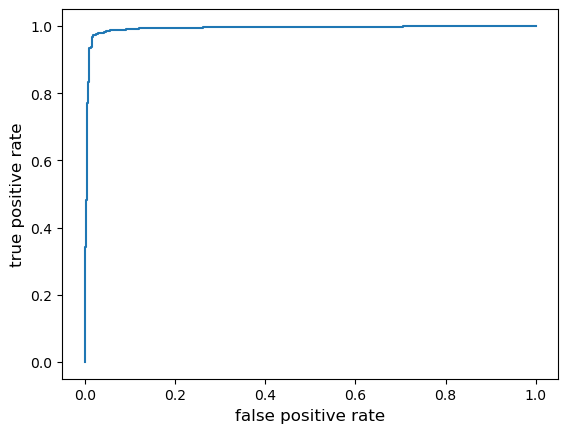

In [27]:
fpr_svm, tpr_svm, thresholds_svm_1 = metrics.roc_curve(y_test, y_pred_prob_test)

plt.plot(fpr_svm,tpr_svm)

plt.xlabel('false positive rate', fontsize=12)
plt.ylabel('true positive rate', fontsize=12)

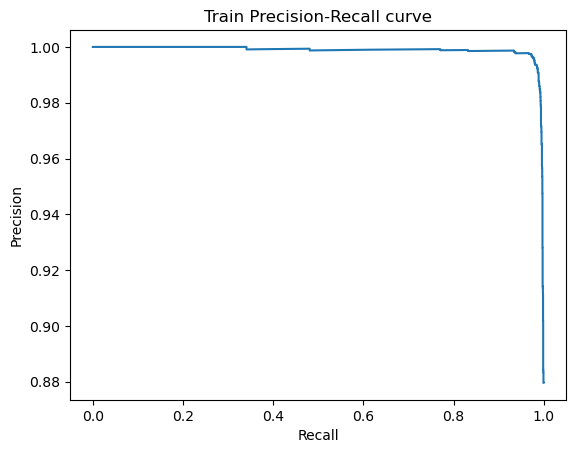

In [28]:
from sklearn.metrics import precision_recall_curve

precision_svm, recall_svm, thresholds_svm_2 = precision_recall_curve(y_test, y_pred_prob_test)
plt.plot(recall_svm, precision_svm)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [29]:
%store fpr_svm
%store tpr_svm
%store thresholds_svm_1
%store precision_svm
%store recall_svm
%store thresholds_svm_2

Stored 'fpr_svm' (ndarray)
Stored 'tpr_svm' (ndarray)
Stored 'thresholds_svm_1' (ndarray)
Stored 'precision_svm' (ndarray)
Stored 'recall_svm' (ndarray)
Stored 'thresholds_svm_2' (ndarray)
